In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [25]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.2)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.2)
    return cheb_high


In [26]:
df = pd.read_csv("100_10000_100.csv"); df

,n,max,empty
0,100,4,35
1,100,4,33
2,100,5,33
3,100,4,32
4,100,3,37
...,...,...,...
9995,10000,6,3726
9996,10000,6,3628
9997,10000,7,3672
9998,10000,6,3664


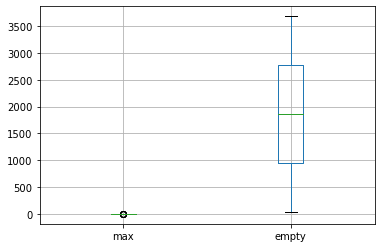

In [27]:
grouped = df.groupby("n")
grouped.mean().boxplot()

In [28]:
grouped.mean()

,max,empty
n,,
100,4.35,36.54
200,4.57,73.15
300,4.85,110.73
400,4.99,146.37
500,5.13,182.73
...,...,...
9600,6.66,3530.32
9700,6.70,3563.37
9800,6.58,3602.23


# Max

In [29]:
grouped["max"].describe()

,count,mean,std,min,25%,50%,75%,max
n,,,,,,,,
100,100.00,4.35,0.77,3.00,4.00,4.00,5.00,7.00
200,100.00,4.57,0.76,3.00,4.00,4.00,5.00,8.00
300,100.00,4.85,0.77,4.00,4.00,5.00,5.00,7.00
400,100.00,4.99,0.77,4.00,4.00,5.00,5.00,7.00
500,100.00,5.13,0.84,4.00,5.00,5.00,6.00,8.00
...,...,...,...,...,...,...,...,...
9600,100.00,6.66,0.61,6.00,6.00,7.00,7.00,8.00
9700,100.00,6.70,0.75,5.00,6.00,7.00,7.00,9.00
9800,100.00,6.58,0.68,5.00,6.00,7.00,7.00,9.00


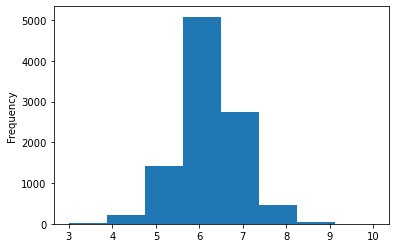

In [30]:
df["max"].plot.hist(bins=8)

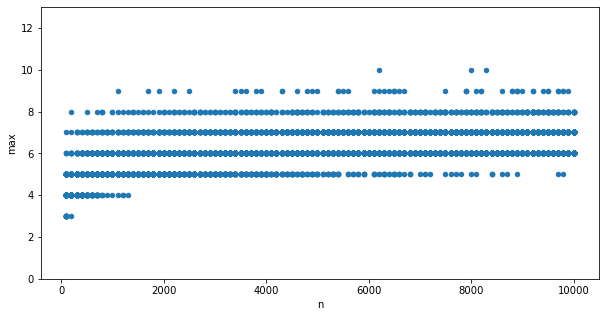

In [31]:
df.plot.scatter(x="n", y="max", figsize=(10, 5), ylim=(0, 13))

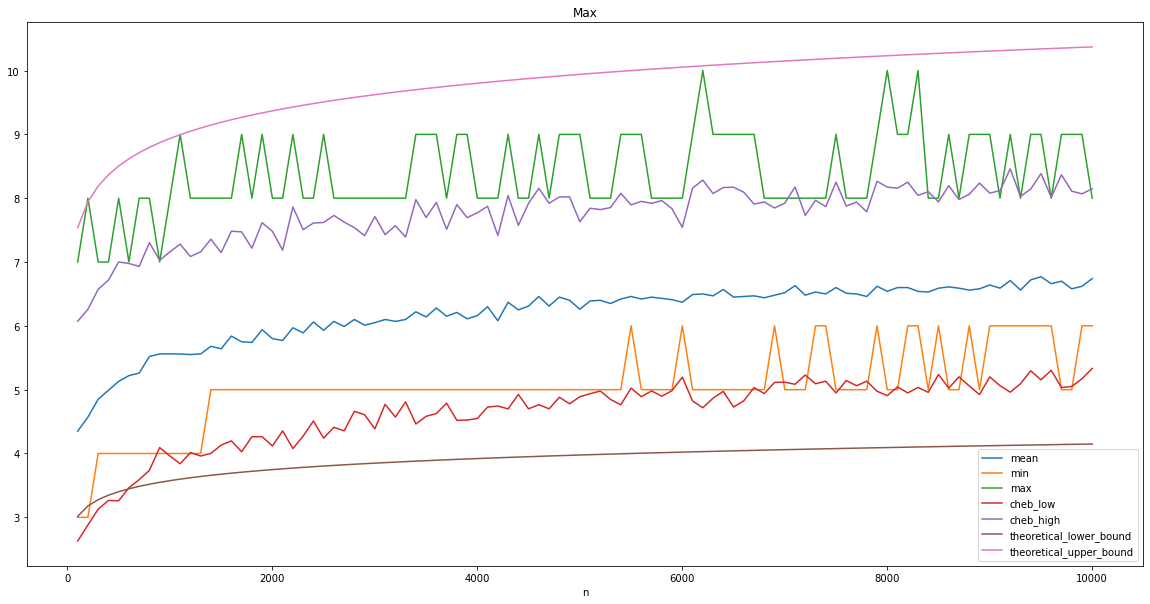

In [32]:
described = grouped["max"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)   # cheb 5%
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1) # cheb 5%
described["theoretical_lower_bound"] = np.log(described.index) * 1 / (np.log(np.log(described.index)))
described["theoretical_upper_bound"] = 2.5 * np.log(described.index) * 1 / (np.log(np.log(described.index)))
described.drop(["std"], axis=1).plot(title="Max", figsize=(20,10))

# Empty
* Niech $Y$ będzie _liczbą pustych urn_
* Szukamy $\mathbb{E}[Y]$
* Niech $X_i$ będą zmiennymi indykatorowymi takimi że jeżeli $X_i = 1$ to _$i$-ta urna jest pusta_, $X_i = 0$ w p.p.

$$Y = X_1 + X_2 + \cdots + X_n$$

Problem sprowadza się do policzenia $\mathbb{E}[X_i]$ dla każdego $i$

$$E[Y] = E[X_1] + E[X_2] + \cdots + E[X_n]$$

Zatem z liniowości:

$$E[X_i] = 1 P(X_i = 1) + 0 P(X_i = 0) = P(X_i = 1) = P(\text{urna $i$ jest pusta}) = \left(1 - \frac{1}{n}\right)^m$$

ostatnia równość bierze się z tego że kule $1, 2, \ldots, m$ muszą wszystkie wpaść do urny różnej od $i$ - każde z prawdopodobieństwem $1 - \frac{1}{n}$.

Stąd

$$E[Y] = \sum_i^n \mathbb{E}[X_i] = \sum_i^n \mathbb{E}\left[\left(1 - \frac{1}{n}\right)^m\right] = n \left(1 - \frac{1}{n}\right)^m$$

Gdy $m = n$

$$E[Y] = n \left(1 - \frac{1}{n}\right)^n = \frac{n}{e}$$

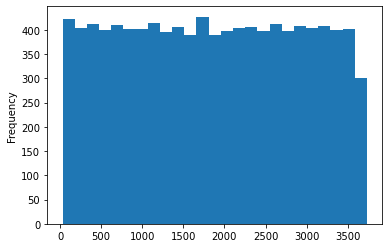

In [33]:
df["empty"].plot.hist(bins=25)

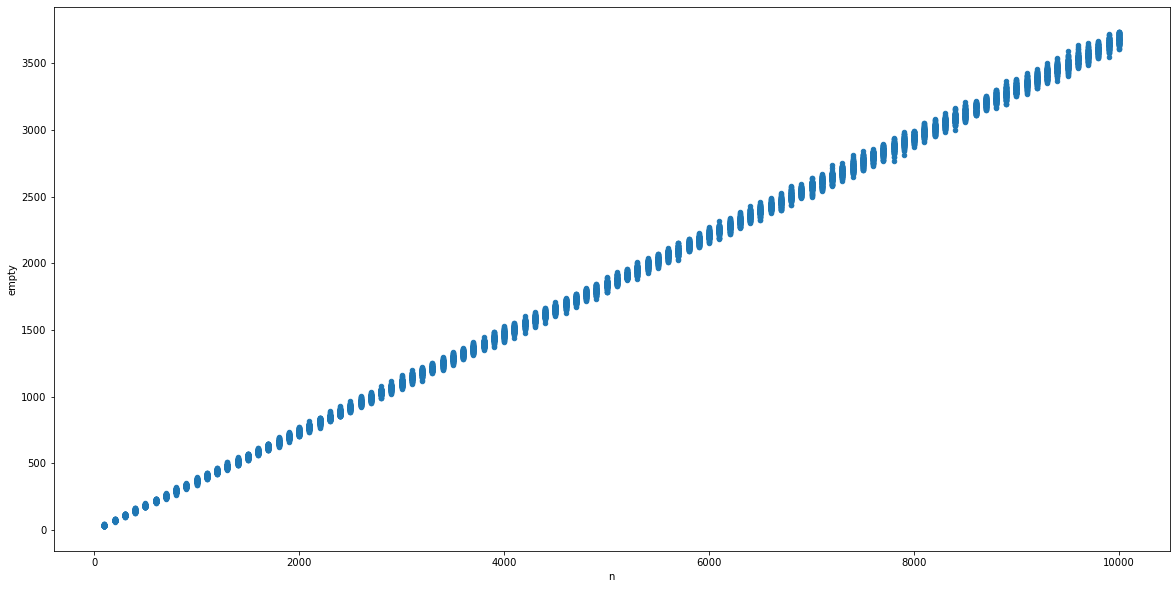

In [34]:
df.plot.scatter(x="n", y="empty", figsize=(20, 10))

In [35]:
grouped["empty"].describe()

,count,mean,std,min,25%,50%,75%,max
n,,,,,,,,
100,100.00,36.54,2.82,30.00,34.75,37.00,39.00,43.00
200,100.00,73.15,4.23,64.00,71.00,73.00,76.25,83.00
300,100.00,110.73,4.97,98.00,107.00,111.00,114.00,121.00
400,100.00,146.37,7.20,131.00,140.75,146.00,150.00,166.00
500,100.00,182.73,5.83,170.00,179.00,182.00,187.00,200.00
...,...,...,...,...,...,...,...,...
9600,100.00,3530.32,32.22,3465.00,3505.75,3531.00,3548.00,3633.00
9700,100.00,3563.37,32.28,3489.00,3545.75,3563.50,3584.00,3654.00
9800,100.00,3602.23,28.83,3536.00,3584.75,3603.00,3620.50,3666.00


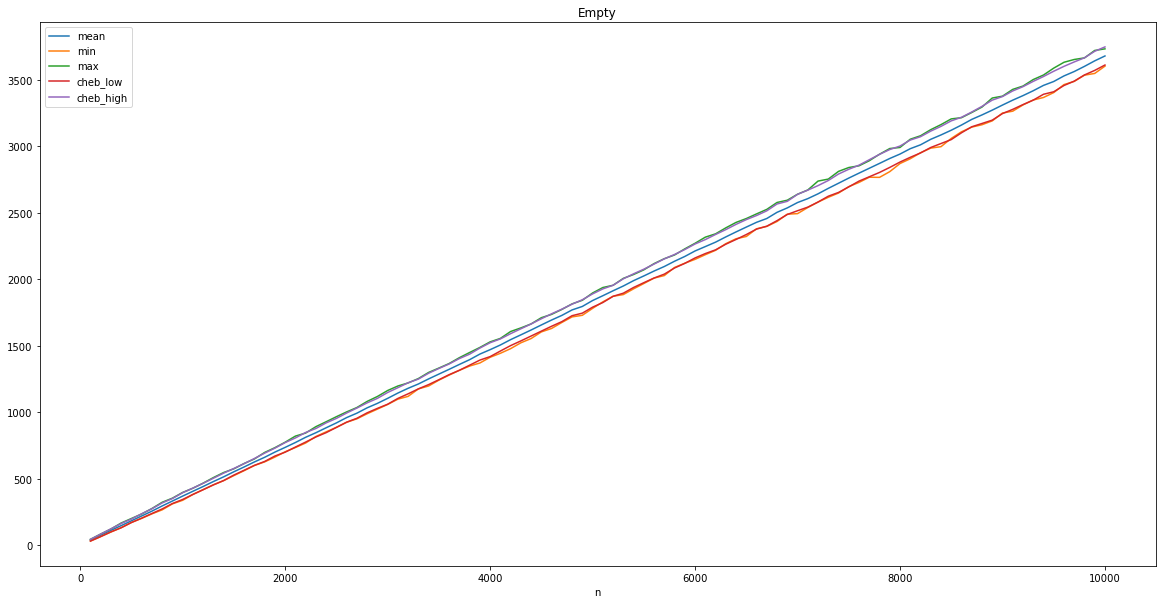

In [36]:
described = grouped["empty"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.drop(["std"], axis=1).plot(title="Empty", figsize=(20,10))